🚀 HYBRID PROPHET-LSTM FUTURE FORECASTING SYSTEM
Lookback Window: 168 hours (7.0 days)
Forecast Horizon: 168 hours (7.0 days)

📦 Loading hybrid model components...
✅ Prophet Model: 26304 historical observations
✅ LSTM Architecture: Input shape (None, 168, 1)
✅ Last Training Date: 2013-12-31 23:00:00
✅ Residual Scaler: MinMaxScaler

🔮 Initiating 168-step ahead forecast...
📊 Generating Prophet baseline forecast...
🧠 Preparing LSTM residual prediction sequence...
🔄 Executing recursive residual forecasting...
  ✓ Completed 24/168 steps (14.3%)
  ✓ Completed 48/168 steps (28.6%)
  ✓ Completed 72/168 steps (42.9%)
  ✓ Completed 96/168 steps (57.1%)
  ✓ Completed 120/168 steps (71.4%)
  ✓ Completed 144/168 steps (85.7%)
  ✓ Completed 168/168 steps (100.0%)
✅ Forecast complete: 2014-01-01 00:00:00 to 2014-01-07 23:00:00

📊 FORECAST STATISTICS & DIAGNOSTICS

🎯 Aggregate Load Statistics:
  Total Predicted Load (MWh)...................         6.82
  Mean Hourly Load (MW)........................  

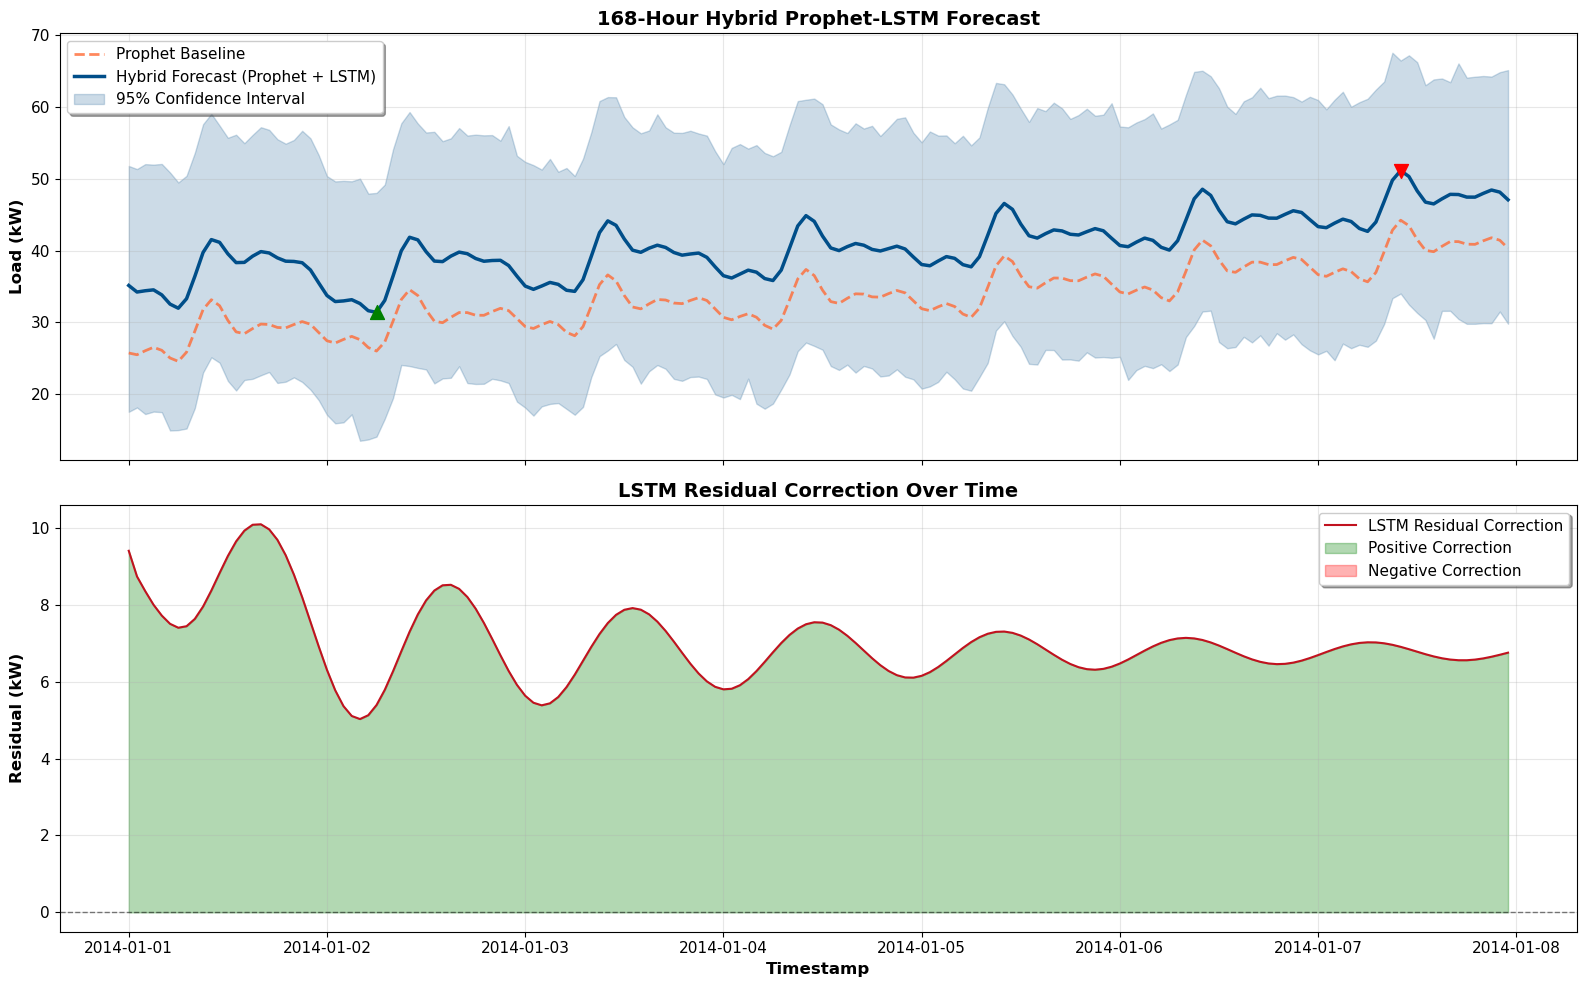

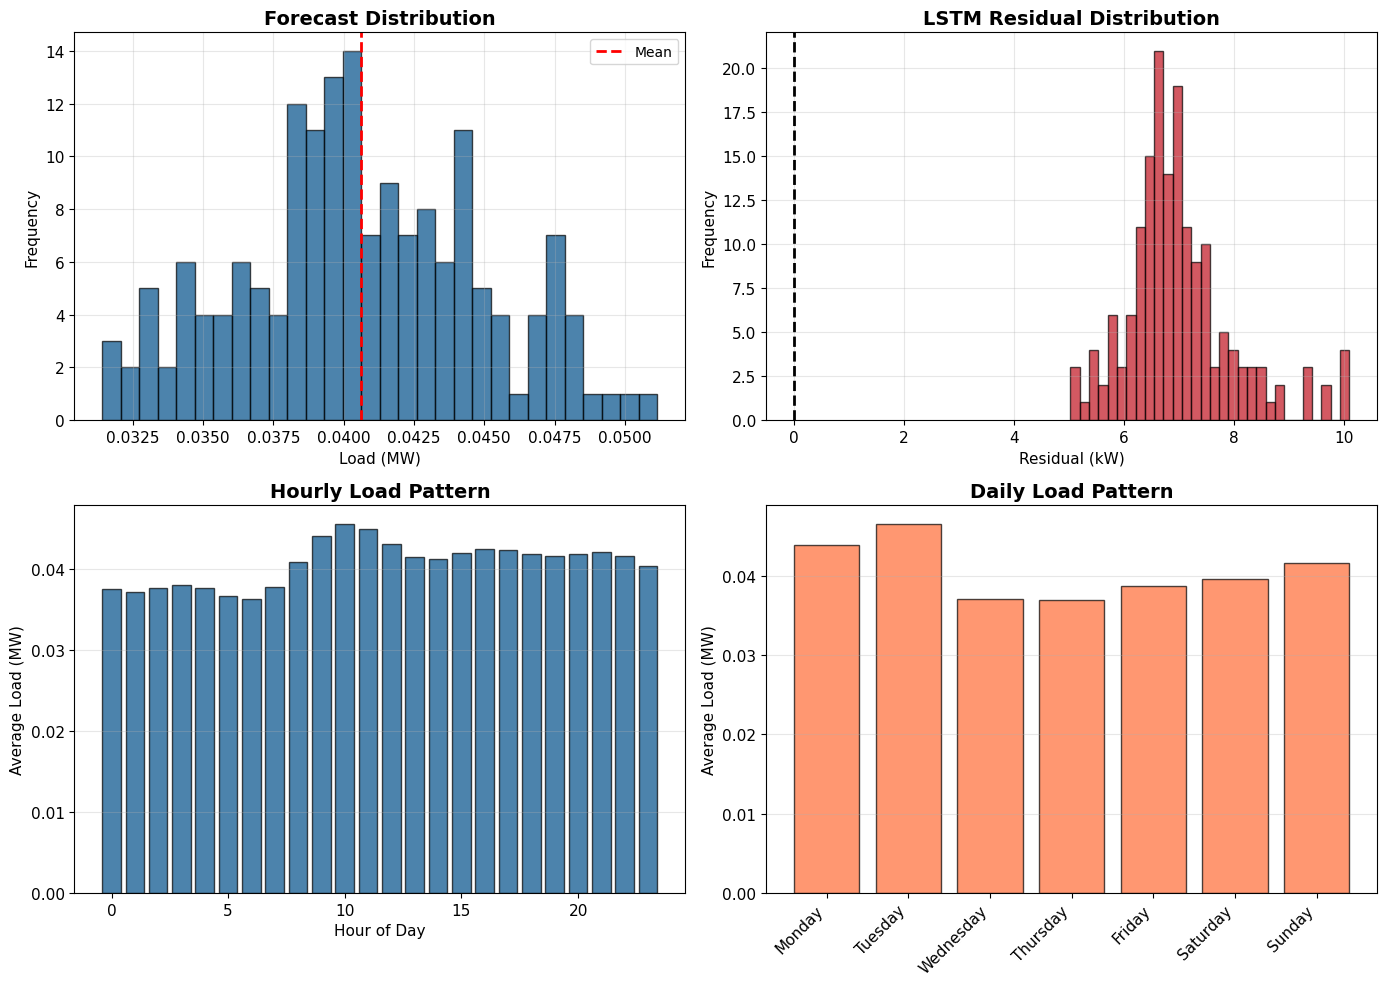

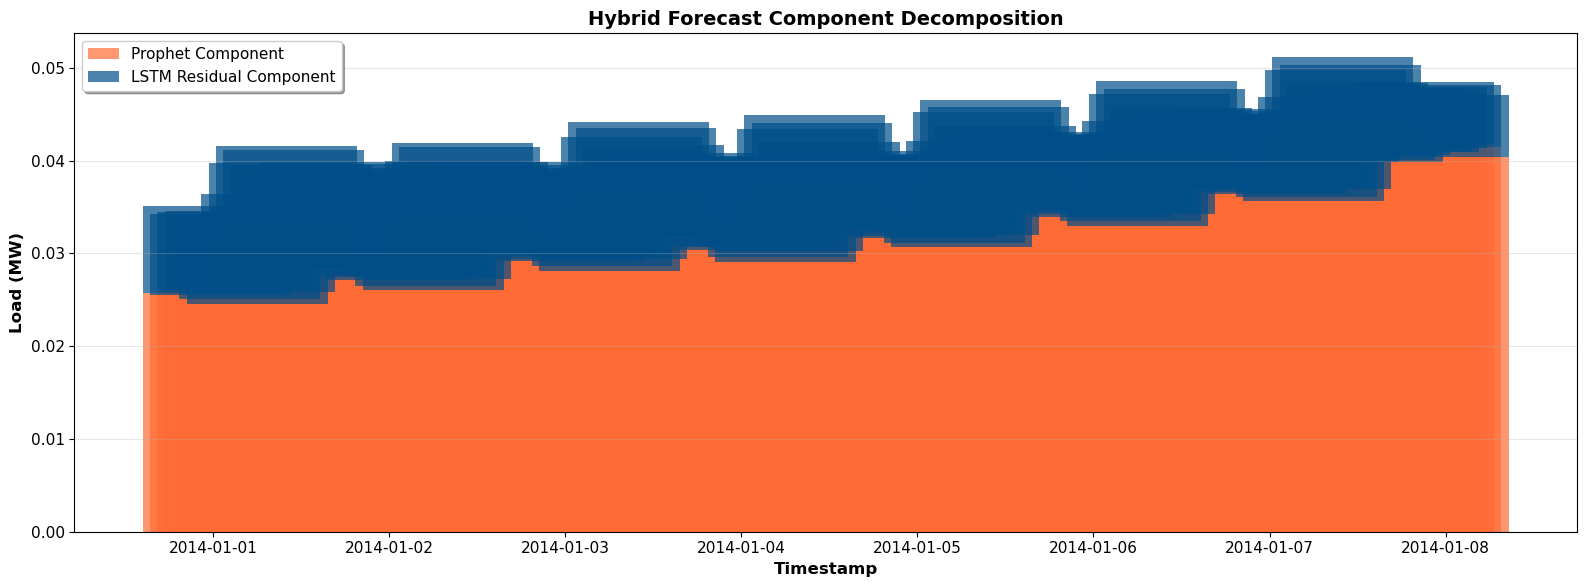


💾 Saving results...
✅ All results saved to './forecasts/' directory

📝 TECHNICAL PAPER SUMMARY

FORECAST SPECIFICATION:
  Methodology: Hybrid Prophet-LSTM Sequential Forecasting
  Lookback Window: 168 hours (7.0 days)
  Forecast Horizon: 168 hours (7.0 days)
  Forecast Period: 2014-01-01 00:00:00 to 2014-01-07 23:00:00
  Number of Predictions: 168

KEY PERFORMANCE INDICATORS:
  Total Predicted Energy: 6.82 MWh
  Average Load: 0.04 MW
  Peak Load: 0.05 MW (at 2014-01-07 10:00:00)
  Base Load: 0.03 MW (at 2014-01-02 06:00:00)
  Load Factor: 79.40%

LSTM RESIDUAL CORRECTION:
  Mean Correction: 7.02 kW
  Mean Absolute Correction: 7.02 kW
  Maximum Positive Adjustment: 10.10 kW
  Maximum Negative Adjustment: 5.03 kW
  Correction Range: 5.07 kW

MODEL CONTRIBUTION:
  Prophet Baseline: 0.03 MW (average)
  LSTM Adjustment: 0.0070 MW (average)
  Prophet-Hybrid Correlation: 0.9740

COMPUTATIONAL DETAILS:
  LSTM Architecture: Sequential autoregressive prediction
  Residual Scaling: MinMaxScaler


In [11]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from prophet import Prophet
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

tf.get_logger().setLevel('ERROR')

plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 100

class ForecastConfig:
    """
    Configuration class containing all hyperparameters and file paths.
    This structure facilitates reproducibility and parameter tuning.
    """

    TIME_STEPS = 168             
    FORECAST_HORIZON = 168       
    
    HYBRID_MODEL_PATH = '../models/hybrid_prophet_lstm_model.pkl'
    PROPHET_COMPONENTS_PATH = '../models/prophet_components.pkl'
    OUTPUT_DIR = './forecasts'
    
    CONFIDENCE_INTERVAL = 0.95   
    
    SAVE_RESULTS = True
    GENERATE_DIAGNOSTICS = True

config = ForecastConfig()

os.makedirs(config.OUTPUT_DIR, exist_ok=True)

print("="*80)
print(" HYBRID PROPHET-LSTM FUTURE FORECASTING SYSTEM")
print("="*80)
print(f"Lookback Window: {config.TIME_STEPS} hours ({config.TIME_STEPS/24:.1f} days)")
print(f"Forecast Horizon: {config.FORECAST_HORIZON} hours ({config.FORECAST_HORIZON/24:.1f} days)")
print("="*80)

def load_hybrid_components(hybrid_path, components_path):
    """
    Load and validate all hybrid model components.
    
    Returns:
        tuple: (prophet_model, lstm_model, scaler, residual_df, last_date)
    """
    try:
        print(f"\n📦 Loading hybrid model components...")
        
        hybrid_components = joblib.load(hybrid_path)
        m_prophet = hybrid_components['prophet_model']
        m_lstm = hybrid_components['residual_lstm']
        residual_scaler = hybrid_components['residual_scaler']
        
        prophet_components = joblib.load(components_path)
        df_lstm_input = prophet_components['residual_df']
        
        last_historical_date = m_prophet.history['ds'].max()
        lstm_input_shape = m_lstm.input_shape
        
        print(f"✅ Prophet Model: {len(m_prophet.history)} historical observations")
        print(f"✅ LSTM Architecture: Input shape {lstm_input_shape}")
        print(f"✅ Last Training Date: {last_historical_date}")
        print(f"✅ Residual Scaler: {type(residual_scaler).__name__}")
        
        return m_prophet, m_lstm, residual_scaler, df_lstm_input, last_historical_date
        
    except Exception as e:
        print(f"❌ Error loading components: {e}")
        print("Ensure all model files exist in '../models/' directory")
        raise

m_prophet, m_lstm, residual_scaler, df_lstm_input, last_train_date = load_hybrid_components(
    config.HYBRID_MODEL_PATH, 
    config.PROPHET_COMPONENTS_PATH
)

def generate_hybrid_forecast(prophet_model, lstm_model, scaler, residual_df, 
   
    if verbose:
        print(f"\n Initiating {horizon}-step ahead forecast...")
    
    if verbose:
        print(" Generating Prophet baseline forecast...")
    future_dates = prophet_model.make_future_dataframe(
        periods=horizon, 
        freq='h', 
        include_history=False
    )
    prophet_forecast = prophet_model.predict(future_dates)
    yhat_prophet = prophet_forecast['yhat'].values

    yhat_lower = prophet_forecast['yhat_lower'].values
    yhat_upper = prophet_forecast['yhat_upper'].values

    if verbose:
        print(" Preparing LSTM residual prediction sequence...")
    residual_values = residual_df['residual'].values.reshape(-1, 1)
    scaled_residuals = scaler.transform(residual_values)
    lstm_history = scaled_residuals.copy()

    lstm_predictions_scaled = []
    lstm_predictions = []
    
    if verbose:
        print(f" Executing recursive residual forecasting...")
    
    for t in range(horizon):
        sequence = lstm_history[-time_steps:].reshape(1, time_steps, 1)
        
        pred_scaled = lstm_model.predict(sequence, verbose=0)[0, 0]
        lstm_predictions_scaled.append(pred_scaled)
        
        lstm_history = np.append(lstm_history, [[pred_scaled]], axis=0)
        
        pred_original = scaler.inverse_transform([[pred_scaled]])[0, 0]
        lstm_predictions.append(pred_original)
        
        if verbose and (t + 1) % 24 == 0:
            print(f"  ✓ Completed {t + 1}/{horizon} steps ({(t+1)/horizon*100:.1f}%)")
    
    lstm_residuals = np.array(lstm_predictions)
    hybrid_forecast = yhat_prophet + lstm_residuals
    
    hybrid_lower = yhat_lower + lstm_residuals
    hybrid_upper = yhat_upper + lstm_residuals
    
    df_forecast = pd.DataFrame({
        'timestamp': future_dates['ds'],
        'prophet_baseline': yhat_prophet,
        'prophet_lower': yhat_lower,
        'prophet_upper': yhat_upper,
        'lstm_residual': lstm_residuals,
        'lstm_residual_scaled': np.array(lstm_predictions_scaled),
        'hybrid_forecast': hybrid_forecast,
        'hybrid_lower': hybrid_lower,
        'hybrid_upper': hybrid_upper
    })
    
    df_forecast['hour'] = df_forecast['timestamp'].dt.hour
    df_forecast['day_of_week'] = df_forecast['timestamp'].dt.dayofweek
    df_forecast['day_name'] = df_forecast['timestamp'].dt.day_name()
    
    if verbose:
        print(f" Forecast complete: {df_forecast['timestamp'].min()} to {df_forecast['timestamp'].max()}")
    
    return df_forecast

df_forecast = generate_hybrid_forecast(
    m_prophet, 
    m_lstm, 
    residual_scaler, 
    df_lstm_input,
    config.FORECAST_HORIZON, 
    config.TIME_STEPS,
    verbose=True
)

print("\n" + "="*80)
print(" FORECAST STATISTICS & DIAGNOSTICS")
print("="*80)

stats_dict = {
    'Total Predicted Load (MWh)': df_forecast['hybrid_forecast'].sum() / 1000,
    'Mean Hourly Load (MW)': df_forecast['hybrid_forecast'].mean() / 1000,
    'Peak Load (MW)': df_forecast['hybrid_forecast'].max() / 1000,
    'Minimum Load (MW)': df_forecast['hybrid_forecast'].min() / 1000,
    'Load Factor (%)': (df_forecast['hybrid_forecast'].mean() / df_forecast['hybrid_forecast'].max()) * 100,
    'Standard Deviation (MW)': df_forecast['hybrid_forecast'].std() / 1000,
    'Coefficient of Variation (%)': (df_forecast['hybrid_forecast'].std() / df_forecast['hybrid_forecast'].mean()) * 100
}

residual_stats = {
    'Mean LSTM Residual (kW)': df_forecast['lstm_residual'].mean(),
    'Std LSTM Residual (kW)': df_forecast['lstm_residual'].std(),
    'Mean Absolute Residual (kW)': df_forecast['lstm_residual'].abs().mean(),
    'Max Positive Correction (kW)': df_forecast['lstm_residual'].max(),
    'Max Negative Correction (kW)': df_forecast['lstm_residual'].min(),
    'Residual Range (kW)': df_forecast['lstm_residual'].max() - df_forecast['lstm_residual'].min()
}

comparison_stats = {
    'Prophet Mean (MW)': df_forecast['prophet_baseline'].mean() / 1000,
    'Hybrid Mean (MW)': df_forecast['hybrid_forecast'].mean() / 1000,
    'Mean Difference (MW)': (df_forecast['hybrid_forecast'].mean() - df_forecast['prophet_baseline'].mean()) / 1000,
    'Correlation': np.corrcoef(df_forecast['prophet_baseline'], df_forecast['hybrid_forecast'])[0, 1]
}

print("\n Aggregate Load Statistics:")
for key, value in stats_dict.items():
    print(f"  {key:.<45} {value:>12.2f}")

print("\n LSTM Residual Correction Analysis:")
for key, value in residual_stats.items():
    print(f"  {key:.<45} {value:>12.2f}")

print("\n  Prophet vs Hybrid Comparison:")
for key, value in comparison_stats.items():
    print(f"  {key:.<45} {value:>12.4f}")

print("\n Time-Based Analysis:")
daily_stats = df_forecast.groupby(df_forecast['timestamp'].dt.date).agg({
    'hybrid_forecast': ['mean', 'max', 'min', 'std']
}).round(2)
print(f"  Average Daily Load: {df_forecast.groupby(df_forecast['timestamp'].dt.date)['hybrid_forecast'].sum().mean()/1000:.2f} MWh")
print(f"  Peak occurs at: {df_forecast.loc[df_forecast['hybrid_forecast'].idxmax(), 'timestamp']}")
print(f"  Minimum occurs at: {df_forecast.loc[df_forecast['hybrid_forecast'].idxmin(), 'timestamp']}")

print("\n Generating publication-quality visualizations...")

fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

ax1 = axes[0]
ax1.plot(df_forecast['timestamp'], df_forecast['prophet_baseline'], 
         label='Prophet Baseline', linestyle='--', color='#FF6B35', linewidth=2, alpha=0.8)
ax1.plot(df_forecast['timestamp'], df_forecast['hybrid_forecast'], 
         label='Hybrid Forecast (Prophet + LSTM)', color='#004E89', linewidth=2.5)
ax1.fill_between(df_forecast['timestamp'], 
                  df_forecast['hybrid_lower'], 
                  df_forecast['hybrid_upper'],
                  alpha=0.2, color='#004E89', label='95% Confidence Interval')
ax1.set_ylabel('Load (kW)', fontsize=12, fontweight='bold')
ax1.set_title(f'{config.FORECAST_HORIZON}-Hour Hybrid Prophet-LSTM Forecast', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='best', frameon=True, shadow=True, fontsize=11)
ax1.grid(True, alpha=0.3)

peak_idx = df_forecast['hybrid_forecast'].idxmax()
min_idx = df_forecast['hybrid_forecast'].idxmin()
ax1.scatter(df_forecast.loc[peak_idx, 'timestamp'], 
            df_forecast.loc[peak_idx, 'hybrid_forecast'],
            color='red', s=100, zorder=5, marker='v', label='Peak Load')
ax1.scatter(df_forecast.loc[min_idx, 'timestamp'], 
            df_forecast.loc[min_idx, 'hybrid_forecast'],
            color='green', s=100, zorder=5, marker='^', label='Min Load')

ax2 = axes[1]
ax2.plot(df_forecast['timestamp'], df_forecast['lstm_residual'], 
         color='#C1121F', linewidth=1.5, label='LSTM Residual Correction')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.fill_between(df_forecast['timestamp'], 0, df_forecast['lstm_residual'],
                  where=(df_forecast['lstm_residual'] >= 0), alpha=0.3, color='green', label='Positive Correction')
ax2.fill_between(df_forecast['timestamp'], 0, df_forecast['lstm_residual'],
                  where=(df_forecast['lstm_residual'] < 0), alpha=0.3, color='red', label='Negative Correction')
ax2.set_xlabel('Timestamp', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residual (kW)', fontsize=12, fontweight='bold')
ax2.set_title('LSTM Residual Correction Over Time', fontsize=14, fontweight='bold')
ax2.legend(loc='best', frameon=True, shadow=True, fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(config.OUTPUT_DIR, 'hybrid_forecast_main.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df_forecast['hybrid_forecast']/1000, bins=30, 
                color='#004E89', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df_forecast['hybrid_forecast'].mean()/1000, 
                   color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].set_xlabel('Load (MW)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Forecast Distribution', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(df_forecast['lstm_residual'], bins=30, 
                color='#C1121F', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residual (kW)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('LSTM Residual Distribution', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

hourly_avg = df_forecast.groupby('hour')['hybrid_forecast'].mean() / 1000
axes[1, 0].bar(hourly_avg.index, hourly_avg.values, 
               color='#004E89', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Hour of Day', fontsize=11)
axes[1, 0].set_ylabel('Average Load (MW)', fontsize=11)
axes[1, 0].set_title('Hourly Load Pattern', fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

daily_avg = df_forecast.groupby('day_name')['hybrid_forecast'].mean() / 1000
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex([d for d in day_order if d in daily_avg.index])
axes[1, 1].bar(range(len(daily_avg)), daily_avg.values, 
               color='#FF6B35', alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(daily_avg)))
axes[1, 1].set_xticklabels(daily_avg.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Average Load (MW)', fontsize=11)
axes[1, 1].set_title('Daily Load Pattern', fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(os.path.join(config.OUTPUT_DIR, 'forecast_distributions.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))
x = np.arange(len(df_forecast))
width = 0.8

prophet_contribution = df_forecast['prophet_baseline'].values / 1000
lstm_contribution = df_forecast['lstm_residual'].values / 1000

ax.bar(df_forecast['timestamp'], prophet_contribution, 
       width=width, label='Prophet Component', color='#FF6B35', alpha=0.7)
ax.bar(df_forecast['timestamp'], lstm_contribution, 
       width=width, bottom=prophet_contribution, 
       label='LSTM Residual Component', color='#004E89', alpha=0.7)

ax.set_xlabel('Timestamp', fontsize=12, fontweight='bold')
ax.set_ylabel('Load (MW)', fontsize=12, fontweight='bold')
ax.set_title('Hybrid Forecast Component Decomposition', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, frameon=True, shadow=True)
ax.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(os.path.join(config.OUTPUT_DIR, 'component_decomposition.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

if config.SAVE_RESULTS:
    print("\n💾 Saving results...")
    
    df_forecast.to_csv(os.path.join(config.OUTPUT_DIR, 'forecast_results.csv'), index=False)
    
    summary_df = pd.DataFrame({
        'Metric': list(stats_dict.keys()) + list(residual_stats.keys()) + list(comparison_stats.keys()),
        'Value': list(stats_dict.values()) + list(residual_stats.values()) + list(comparison_stats.values())
    })
    summary_df.to_csv(os.path.join(config.OUTPUT_DIR, 'forecast_statistics.csv'), index=False)
    
    # Save hourly and daily patterns
    hourly_pattern = df_forecast.groupby('hour').agg({
        'hybrid_forecast': ['mean', 'std', 'min', 'max'],
        'lstm_residual': ['mean', 'std']
    }).round(2)
    hourly_pattern.to_csv(os.path.join(config.OUTPUT_DIR, 'hourly_pattern.csv'))
    
    print(f" All results saved to '{config.OUTPUT_DIR}/' directory")

print("\n" + "="*80)
print(" TECHNICAL PAPER SUMMARY")
print("="*80)
print(f"""
FORECAST SPECIFICATION:
  Methodology: Hybrid Prophet-LSTM Sequential Forecasting
  Lookback Window: {config.TIME_STEPS} hours ({config.TIME_STEPS/24} days)
  Forecast Horizon: {config.FORECAST_HORIZON} hours ({config.FORECAST_HORIZON/24} days)
  Forecast Period: {df_forecast['timestamp'].min()} to {df_forecast['timestamp'].max()}
  Number of Predictions: {len(df_forecast)}

KEY PERFORMANCE INDICATORS:
  Total Predicted Energy: {df_forecast['hybrid_forecast'].sum()/1000:.2f} MWh
  Average Load: {df_forecast['hybrid_forecast'].mean()/1000:.2f} MW
  Peak Load: {df_forecast['hybrid_forecast'].max()/1000:.2f} MW (at {df_forecast.loc[peak_idx, 'timestamp']})
  Base Load: {df_forecast['hybrid_forecast'].min()/1000:.2f} MW (at {df_forecast.loc[min_idx, 'timestamp']})
  Load Factor: {stats_dict['Load Factor (%)']:.2f}%

LSTM RESIDUAL CORRECTION:
  Mean Correction: {residual_stats['Mean LSTM Residual (kW)']:.2f} kW
  Mean Absolute Correction: {residual_stats['Mean Absolute Residual (kW)']:.2f} kW
  Maximum Positive Adjustment: {residual_stats['Max Positive Correction (kW)']:.2f} kW
  Maximum Negative Adjustment: {residual_stats['Max Negative Correction (kW)']:.2f} kW
  Correction Range: {residual_stats['Residual Range (kW)']:.2f} kW

MODEL CONTRIBUTION:
  Prophet Baseline: {comparison_stats['Prophet Mean (MW)']:.2f} MW (average)
  LSTM Adjustment: {comparison_stats['Mean Difference (MW)']:.4f} MW (average)
  Prophet-Hybrid Correlation: {comparison_stats['Correlation']:.4f}

COMPUTATIONAL DETAILS:
  LSTM Architecture: Sequential autoregressive prediction
  Residual Scaling: {type(residual_scaler).__name__}
  Prediction Mode: Recursive multi-step ahead
  Uncertainty Quantification: {config.CONFIDENCE_INTERVAL*100}% confidence intervals

OUTPUT FILES:
  • forecast_results.csv - Complete forecast data
  • forecast_statistics.csv - Summary statistics
  • hourly_pattern.csv - Hourly load patterns
  • hybrid_forecast_main.png - Main forecast visualization
  • forecast_distributions.png - Statistical distributions
  • component_decomposition.png - Forecast components
""")
print("="*80)
print(" FORECASTING PIPELINE COMPLETE")
print("="*80)